In [26]:
import os
import pandas as pd

In [27]:
os.chdir("/Users/mapoa/PycharmProjects/project-voi")

In [28]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [29]:
input_folder = '/Users/mapoa/PycharmProjects/project-voi/input'
file_name = 'voiholm.csv'
file_path = os.path.join(input_folder, file_name)

ride_data = pd.read_csv(file_path)

ride_data.head()


ride_id city_name  \
0  97341db7-f89f-45db-9dd1-bcc2620fc1db   voiholm   
1  646c160f-bbb7-4c78-b2ca-bdd8644a8400   voiholm   
2  6082a591-03ca-4a6d-a7f4-af9ea5a30366   voiholm   
3  eea5165f-c8e5-4e61-b604-c219226dbc1e   voiholm   
4  ef26200a-6d0f-40cf-b1fb-91b2a5b6270c   voiholm   

                       start_time  start_lon  start_lat      h3index_big  \
0  2020-08-05 04:27:40.425797 UTC  11.908587  57.687122  881f250613fffff   
1  2020-08-05 07:47:29.060615 UTC  11.908669  57.687050  881f250613fffff   
2   2020-08-05 07:42:37.61098 UTC  11.908693  57.687042  881f250613fffff   
3  2020-08-05 13:38:59.425146 UTC  11.912271  57.689289  881f250613fffff   
4  2020-08-05 03:29:27.859222 UTC  11.913318  57.690361  881f250613fffff   

     h3index_small  
0  891f250612bffff  
1  891f250612bffff  
2  891f250612bffff  
3  891f2506123ffff  
4  891f2506123ffff

In [30]:
ride_data.columns

Index(['ride_id', 'city_name', 'start_time', 'start_lon', 'start_lat',
       'h3index_big', 'h3index_small'],
      dtype='object')

In [31]:
# Checking for missing values and data types
ride_data_info = ride_data.info()

# Basic statistical overview
ride_data_describe = ride_data.describe(include='all')

ride_data_info, ride_data_describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164366 entries, 0 to 164365
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ride_id        164366 non-null  object 
 1   city_name      164366 non-null  object 
 2   start_time     164366 non-null  object 
 3   start_lon      164366 non-null  float64
 4   start_lat      164366 non-null  float64
 5   h3index_big    164366 non-null  object 
 6   h3index_small  164366 non-null  object 
dtypes: float64(2), object(5)
memory usage: 8.8+ MB


(None,
                                      ride_id city_name  \
 count                                 164366    164366   
 unique                                164366         1   
 top     97341db7-f89f-45db-9dd1-bcc2620fc1db   voiholm   
 freq                                       1    164366   
 mean                                     NaN       NaN   
 std                                      NaN       NaN   
 min                                      NaN       NaN   
 25%                                      NaN       NaN   
 50%                                      NaN       NaN   
 75%                                      NaN       NaN   
 max                                      NaN       NaN   
 
                            start_time      start_lon      start_lat  \
 count                          164366  164366.000000  164366.000000   
 unique                         164365            NaN            NaN   
 top     2020-08-11 16:06:15.81985 UTC            NaN            Na

The ride dataset shows the following characteristics:

- **Data Completeness:** There are no missing values in the dataset. Each column has 164,366 entries, which aligns with the number of rows.
- **Data Types:**
    - `ride_id`, `city_name`, `h3index_big`, and `h3index_small` are of type `object`, indicating string or categorical data.
    - `start_time` is also an object, which suggests it is currently in a string format and should be converted to a datetime format for analysis.
    - `start_lon` and `start_lat` are floating-point numbers, representing the geographical coordinates.
- **Unique Values:**
    - Each `ride_id` is unique.
    - There is only one `city_name` ("voiholm"), so this column won't provide diversity in the analysis.
    - There are 38 unique values in `h3index_big` and 326 in `h3index_small`, indicating different areas within the city.
- **Statistical Overview:**
    - The latitude (`start_lat`) and longitude (`start_lon`) values seem reasonable, with no outliers apparent from the min/max values.

In [32]:
input_folder = '/Users/mapoa/PycharmProjects/project-voi/input'
file_name = 'weather_data.csv'
file_path = os.path.join(input_folder, file_name)

weather_data = pd.read_csv(file_path)

weather_data.head()

date  temperature  max_temperature  min_temperature  precipitation
0  2020-07-14         15.9             18.6             14.3           4.66
1  2020-07-15         16.3             21.0             11.2           0.00
2  2020-07-16         17.6             22.0             12.3           0.00
3  2020-07-17         19.4             23.3             15.8           0.00
4  2020-07-18         20.0             22.1             17.3           1.71

In [33]:
weather_data.columns

Index(['date', 'temperature', 'max_temperature', 'min_temperature',
       'precipitation'],
      dtype='object')

In [34]:
# Checking for missing values and data types
weather_data_info = weather_data.info()

# Basic statistical overview
weather_data_describe = weather_data.describe()

weather_data_info, weather_data_describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             49 non-null     object 
 1   temperature      49 non-null     float64
 2   max_temperature  49 non-null     float64
 3   min_temperature  49 non-null     float64
 4   precipitation    49 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


(None,
        temperature  max_temperature  min_temperature  precipitation
 count    49.000000        49.000000        49.000000      49.000000
 mean     18.463265        22.269388        14.583673       1.588776
 std       3.071759         4.090854         2.772360       3.963920
 min      13.900000        16.100000         7.100000       0.000000
 25%      16.200000        19.100000        13.100000       0.000000
 50%      17.600000        21.000000        14.800000       0.000000
 75%      20.900000        25.700000        16.500000       1.190000
 max      24.800000        30.600000        20.300000      19.940000)

- **Data Completeness:** No missing values are present in the dataset. Each column has 49 entries.
- **Data Types:**
    - `date` is of type `object`, indicating it is in string format. It should be converted to a datetime format for analysis.
    - `temperature`, `max_temperature`, `min_temperature`, and `precipitation` are all floating-point numbers.
- **Statistical Overview:**
    - The temperature variables (`temperature`, `max_temperature`, and `min_temperature`) and `precipitation` seem to have reasonable ranges without apparent outliers.

In [35]:
# Convert 'start_time' in ride_data and 'date' in weather_data to datetime
ride_data['start_time'] = pd.to_datetime(ride_data['start_time'])
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Display the first few rows of each dataset to verify the changes
ride_data_head = ride_data.head()
weather_data_head = weather_data.head()

(ride_data_head, weather_data_head)

(                                ride_id city_name  \
 0  97341db7-f89f-45db-9dd1-bcc2620fc1db   voiholm   
 1  646c160f-bbb7-4c78-b2ca-bdd8644a8400   voiholm   
 2  6082a591-03ca-4a6d-a7f4-af9ea5a30366   voiholm   
 3  eea5165f-c8e5-4e61-b604-c219226dbc1e   voiholm   
 4  ef26200a-6d0f-40cf-b1fb-91b2a5b6270c   voiholm   
 
                         start_time  start_lon  start_lat      h3index_big  \
 0 2020-08-05 04:27:40.425797+00:00  11.908587  57.687122  881f250613fffff   
 1 2020-08-05 07:47:29.060615+00:00  11.908669  57.687050  881f250613fffff   
 2 2020-08-05 07:42:37.610980+00:00  11.908693  57.687042  881f250613fffff   
 3 2020-08-05 13:38:59.425146+00:00  11.912271  57.689289  881f250613fffff   
 4 2020-08-05 03:29:27.859222+00:00  11.913318  57.690361  881f250613fffff   
 
      h3index_small  
 0  891f250612bffff  
 1  891f250612bffff  
 2  891f250612bffff  
 3  891f2506123ffff  
 4  891f2506123ffff  ,
         date  temperature  max_temperature  min_temperature  precipita

In [36]:
# Checking for missing values in both datasets
missing_values_ride = ride_data.isnull().sum()
missing_values_weather = weather_data.isnull().sum()

# Summary statistics for both datasets to identify any anomalies or outliers
summary_ride = ride_data.describe(include='all')
summary_weather = weather_data.describe()

(missing_values_ride, missing_values_weather, summary_ride, summary_weather)


(ride_id          0
 city_name        0
 start_time       0
 start_lon        0
 start_lat        0
 h3index_big      0
 h3index_small    0
 dtype: int64,
 date               0
 temperature        0
 max_temperature    0
 min_temperature    0
 precipitation      0
 dtype: int64,
                                      ride_id city_name  \
 count                                 164366    164366   
 unique                                164366         1   
 top     97341db7-f89f-45db-9dd1-bcc2620fc1db   voiholm   
 freq                                       1    164366   
 mean                                     NaN       NaN   
 min                                      NaN       NaN   
 25%                                      NaN       NaN   
 50%                                      NaN       NaN   
 75%                                      NaN       NaN   
 max                                      NaN       NaN   
 std                                      NaN       NaN   
 
          

### Data Quality Inspection Results

### Ride Data

- **Missing Values:** No missing values in any column.
- **Anomalies/Outliers:**
    - The dataset contains 164,366 unique rides.
    - All rides are from a single city, 'voiholm'.
    - `start_time` ranges from 2020-08-01 to 2020-08-30.
    - Longitude (`start_lon`) and latitude (`start_lat`) vary within a specific range, which seems normal given all rides are in one city.
    - There are 38 unique `h3index_big` values and 326 unique `h3index_small` values, indicating different starting locations within the city.

### Weather Data

- **Missing Values:** No missing values in any column.
- **Anomalies/Outliers:**
    - The dataset covers 49 days of weather data.
    - Temperature metrics (`temperature`, `max_temperature`, `min_temperature`) and `precipitation` seem to have realistic ranges without apparent outliers.

In [37]:
# Convert 'start_time' in ride data and 'date' in weather data to datetime format
ride_data['start_time'] = pd.to_datetime(ride_data['start_time'])
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Check the date range for both datasets
ride_date_range = ride_data['start_time'].dt.date.agg(['min', 'max'])
weather_date_range = weather_data['date'].dt.date.agg(['min', 'max'])

ride_date_range, weather_date_range

(min    2020-08-01
 max    2020-08-30
 Name: start_time, dtype: object,
 min    2020-07-14
 max    2020-08-31
 Name: date, dtype: object)

1. **Convert Date and Time Columns:**
    - Convert `start_time` in the ride dataset and `date` in the weather dataset to datetime format.
2. **Data Alignment:**
    - Align the datasets temporally by filtering them to the overlapping date range.

Let's start with these steps.

The date ranges for the datasets are as follows:

- **Ride Data:** August 1, 2020 to August 30, 2020.
- **Weather Data:** July 14, 2020 to August 31, 2020.

Given that the ride data is for the month of August, we should align the weather data to the same period. This involves filtering the weather data to include only the dates from August 1, 2020 to August 30, 2020.

I will now filter the weather data accordingly and then proceed with the next steps.

The weather data is now aligned with the ride data, covering the same date range from August 1, 2020, to August 30, 2020.

In [38]:
# Filter the weather data to match the date range of the ride data
aligned_weather_data = weather_data[(weather_data['date'] >= '2020-08-01') & (weather_data['date'] <= '2020-08-30')]

# Check the first few rows of the aligned weather data
aligned_weather_data.head()

date  temperature  max_temperature  min_temperature  precipitation
18 2020-08-01         17.6             19.3             15.6           0.69
19 2020-08-02         16.7             19.1             14.8           0.00
20 2020-08-03         16.8             19.6             14.3           0.00
21 2020-08-04         15.0             17.1             12.8          11.44
22 2020-08-05         21.5             26.5             17.0           0.50

In [39]:
import plotly.express as px

ride_data['date'] = ride_data['start_time'].dt.date
ride_count_daily = ride_data.groupby('date').size().reset_index(name='ride_count')

fig = px.line(ride_count_daily, x='date', y='ride_count', title='Daily Ride Counts')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of Rides')
fig.show()


In [40]:
weather_data_daily = weather_data.groupby('date').mean().reset_index()

fig = px.line(weather_data_daily, x='date', y='temperature', title='Daily Average Temperature')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Temperature')
fig.show()


In [41]:
import plotly.graph_objects as go

map_center = {'lat': ride_data['start_lat'].mean(), 'lon': ride_data['start_lon'].mean()}
ride_map = go.Figure(go.Scattermapbox(
    lat=ride_data['start_lat'],
    lon=ride_data['start_lon'],
    mode='markers',
    marker=dict(size=5),
    text='Ride',
))

ride_map.update_layout(
    mapbox=dict(
        center=map_center,
        style="stamen-terrain",  
        zoom=12,
    ),
    title="Geospatial Distribution of Rides",
)

ride_map.show()


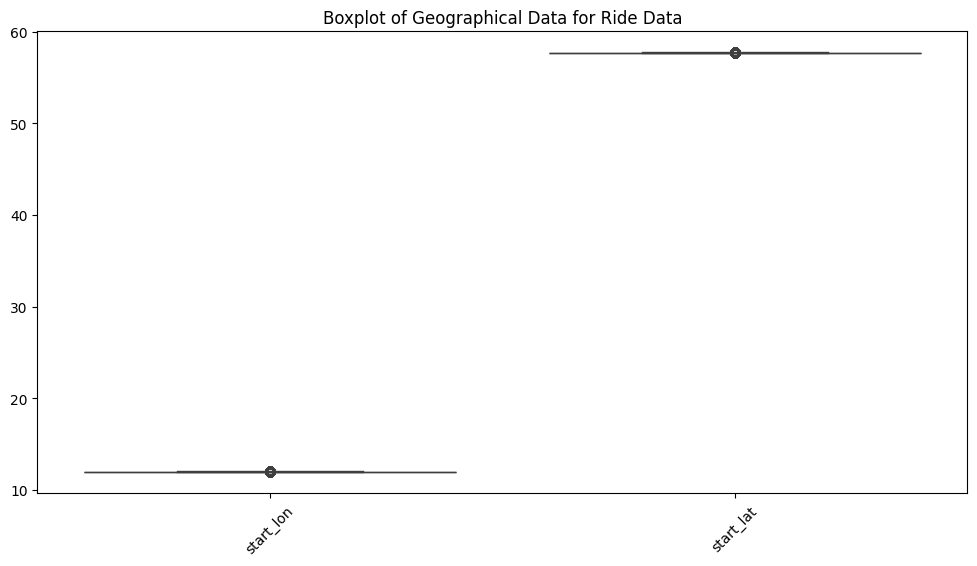

Geographical Outliers in Longitude:
                                         ride_id city_name  \
date                                                         
2020-08-05  c72827b8-eca1-46c0-a5c9-7715326dac46   voiholm   
2020-08-05  2cc60139-ea1c-40bd-ae50-8697b5ebaa71   voiholm   
2020-08-12  3f2d9738-8109-4e62-8ba3-3407adce425d   voiholm   
2020-08-12  9ad61bd9-d3dc-4fb9-830f-52fe30070d6b   voiholm   
2020-08-12  67eb9754-3882-464c-b1d9-25c173741102   voiholm   
...                                          ...       ...   
2020-08-21  2637cc0e-8104-41b5-901a-71658c42e12b   voiholm   
2020-08-21  16e2952b-406f-4d5e-afe5-16b4615d2123   voiholm   
2020-08-21  4ebf2ca3-3f1d-4ddd-a9d3-6b4f77a71d90   voiholm   
2020-08-21  a282b836-1023-4f02-ac9c-b692efa0c435   voiholm   
2020-08-21  59834124-89c8-47f8-80fd-b7dc9b2f62b1   voiholm   

                                 start_time  start_lon  start_lat  \
date                                                                
2020-08-05 2020-08-

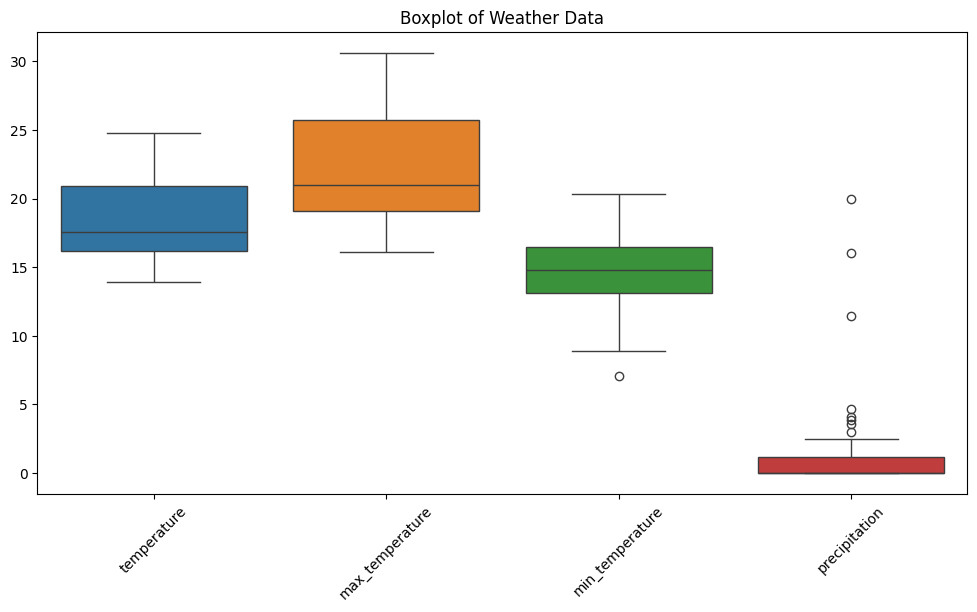

Weather Outliers in temperature:
Empty DataFrame
Columns: [temperature, max_temperature, min_temperature, precipitation]
Index: []
Weather Outliers in max_temperature:
Empty DataFrame
Columns: [temperature, max_temperature, min_temperature, precipitation]
Index: []
Weather Outliers in min_temperature:
            temperature  max_temperature  min_temperature  precipitation
date                                                                    
2020-08-31         14.7             21.5              7.1            0.0
Weather Outliers in precipitation:
            temperature  max_temperature  min_temperature  precipitation
date                                                                    
2020-07-14         15.9             18.6             14.3           4.66
2020-07-23         15.0             16.1             13.6          19.94
2020-07-27         16.5             18.5             14.5          16.03
2020-08-04         15.0             17.1             12.8          11.44
2020-

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Outlier Detection for Ride Data
ride_outlier_columns = ['start_lon', 'start_lat']

plt.figure(figsize=(12, 6))
plt.title("Boxplot of Geographical Data for Ride Data")
sns.boxplot(data=ride_data[ride_outlier_columns])
plt.xticks(rotation=45)
plt.show()

def detect_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

geographical_outliers = detect_outliers_iqr(ride_data, 'start_lon')
print("Geographical Outliers in Longitude:")
print(geographical_outliers)

geographical_outliers = detect_outliers_iqr(ride_data, 'start_lat')
print("\nGeographical Outliers in Latitude:")
print(geographical_outliers)

# Outlier Detection for Weather Data
weather_outlier_columns = ['temperature', 'max_temperature', 'min_temperature', 'precipitation']

plt.figure(figsize=(12, 6))
plt.title("Boxplot of Weather Data")
sns.boxplot(data=weather_data[weather_outlier_columns])
plt.xticks(rotation=45)
plt.show()

for column in weather_outlier_columns:
    weather_outliers = detect_outliers_iqr(weather_data, column)
    print(f"Weather Outliers in {column}:")
    print(weather_outliers)

    Weather Outliers in Temperature:
        There are no outliers in the 'temperature' column of the weather data.

    Weather Outliers in Max Temperature:
        There are no outliers in the 'max_temperature' column of the weather data.

    Weather Outliers in Min Temperature:
        There is one outlier in the 'min_temperature' column of the weather data on the date 2020-08-31. On this date:
            The minimum temperature ('min_temperature') was 7.1°C, which is lower than usual.

    Weather Outliers in Precipitation:
        There are several outliers in the 'precipitation' column of the weather data on various dates:
            On 2020-07-14, there was a high precipitation of 4.66 mm.
            On 2020-07-23, there was an exceptionally high precipitation of 19.94 mm.
            On 2020-07-27, there was a significant precipitation of 16.03 mm.
            On 2020-08-04, there was a substantial precipitation of 11.44 mm.
            On 2020-08-18, there was a moderate precipitation of 2.98 mm.
            On 2020-08-20, there was a moderate precipitation of 4.10 mm.
            On 2020-08-21, there was a moderate precipitation of 3.61 mm.
            On 2020-08-25, there was a moderate precipitation of 3.88 mm.

These outliers in precipitation indicate days with unusually high or moderate rainfall. It's important to note these outliers as they may have an impact on various aspects, including transportation and outdoor activities, which could potentially affect ride frequency in the corresponding period. Further analysis can be conducted to explore the relationship between weather conditions (including precipitation outliers) and ride frequency.